In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy

In [3]:
cd ~/WorkSpace/GoogleDrive/제주_전기차/data

/home/miwoos/WorkSpace/GoogleDrive/제주_전기차/data


In [4]:
ls

 0326전기차수집내용다합침.csv      블로그전기차문장.csv
 CFI전기차보도자료.csv             블로그제사모느영나영전기차동호회merge.csv
 best_model.h5                     빈도수파악.png
 cafe댓글추출후분석.csv            인스타전기차.csv
 df_cafe_commet_merge.csv          인스타전기차충전소.csv
 elc_usewordcloud.png             '전기차 동호회 전기차크롤링.csv'
 elecafe.csv                       전기차_전처리및토큰화.csv
 lr.pkl                           '전기차감성분석(0325).csv'
 lrc.pkl                           전기차감성분석.csv
 model/                            전기차관련검색어인기순.csv
 tvect.pkl                         전기차관심도지역.csv
 감성사전분석.csv                  전기차관심증가.csv
 관련키워드.csv                    전기차전처리추가.csv
 네이버-제주전기차후기통합.csv     전기차키워드관련주제인기순.csv
 네이버블로그감성분석비교.csv      전체본문의댓글결과_2022.03.06.xlsx
 느영나영전기차크롤링.csv          제사모크롤링.csv
 느영나영전기차크롤링.csv.part     카페통합감성추가.csv
'본문 검색 결과_2022.03.06.xlsx'   투플럭스sjeju.csv


In [5]:
df = pd.read_csv('0326전기차수집내용다합침.csv')

In [6]:
df.카페명.value_counts()

전기차동호회(투플럭스)    394778
네이버블로그            8719
느영나영              4932
전기차동호회            4435
제사모               1295
Name: 카페명, dtype: int64

In [19]:
df.head(2)

,제목,내용,유형,조회수,작성날짜,월별,카페명,년별,평가
0,봉고3더블캡,보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요 거래 지역...,제사모 중고장터,130,2022.03.16.,2022.03,제사모,2022,P
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,육지에서 이번주 토욜부터 제주 한달살이 시작하면서 렌트카 알아보고 있어요 육지에선 ...,Q. 종합 질문방,161,2022.03.16.,2022.03,제사모,2022,N


In [27]:
df.카페명.unique()

array(['제사모', '느영나영', '전기차동호회', '네이버블로그', '전기차동호회(투플럭스)'], dtype=object)

<AxesSubplot:xlabel='년별'>

/home/miwoos/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/miwoos/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/miwoos/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/miwoos/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/miwoos/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/miwoos/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:2

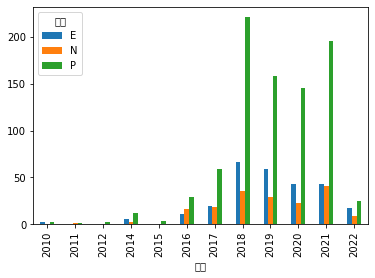

In [7]:
df[df.카페명=='제사모'].groupby([df.년별,df.평가]).내용.count().unstack().plot.bar()

In [75]:
df df.내용.value_counts().values()

SyntaxError: invalid syntax (2495809887.py, line 1)

In [62]:
stopwords = df.내용.value_counts()[105:130].keys()

In [76]:
stopwords

Index(['월 테슬라 전용 일 시불 캐시 백 모델 모델 모델 모델 사용 조건 없다 테슬라 캐시 백', '출석 체크 출석 하다',
       '월 일반 전기차 일 시불 캐시 백 아이오 닉 벤츠 등 전기차 캐시 백', '즐겁다 하루 되다 즐겁다 하루 되다',
       '출석 출석 체크 하다', '좋다 아침 이다 좋다 아침 이다', '출첵 출첵 요', '출석 하다 출석 해 요', '계약 인증',
       '월 일반 전기차 삼성 카드 할부 금리 개월 개 월 최대 만 캐시 백 대출 로 잡히다 않다 중도 상환 수수료 없다 최고 할부 상품 아니다 닉 벤츠 등',
       '반갑다 자기 소개 한글 별명 뜻 관심 있다 전기차 지역 전기차 보유 계 약 미보 유 가입 계기 하다 싶다 말씀',
       '새해 복 많이 받다', '안녕하다 반갑다 부탁드리다', '추다 책 출석 하다', '출첵 좋다 하루 되다',
       '출석 하다 즐겁다 주말 보내다', '아이오 닉 계약 인증 하다',
       '월 일반 전기차 일 시불 캐시 백 아이오 닉 벤츠 폴 스타 코란도 이모션 등 전기차 캐시 백',
       '안녕하다 자기 소개 한글 별명 뜻 관심 있다 전기차 지역 전기차 보유 계 약 미보 유 가입 계기 하다 싶다 말씀',
       '출첵 요 출첵', '출석 하다 즐겁다 주말 되다',
       '대구 르노 년 식 년 월 신차 출고 대구 르노 년 식 년 월 신차 출고 원 판매 정보 거래 방법 직접 거래 배송 방법 판매 직접 연락 하다 직접 거래 시 아래 사항 유의 해주다 불확실하다 판매 본인 미인 증 해외 사기 의심 전화번호 물건 구매 하다 말다 판매 와의 연락 메신저 보다는 전화 메일 등 이용 하다 개인정보 유출 주의 하다 계좌 이체 시 선 입금 유도 하다 경우 안전하다 거래 인지 다시 하다 번 확인 해주다 네이버 등록 되다 판매 물품 내용 개별 판매 자가 등록 한 것 으로서 네이버 카페 등록 위 한 시스템 만 제공 하다 내용 대하 여 일체 책임 지지 

In [13]:
df.내용.str.contains('출석 하다')

0         False
1         False
2         False
3         False
4         False
          ...  
414154    False
414155    False
414156    False
414157    False
414158    False
Name: 내용, Length: 414159, dtype: bool

In [39]:
df.내용.str.contains(f'{df.내용.value_counts()[:60].keys()[0]}').value_counts()

False    412996
True       1163
Name: 내용, dtype: int64